In [1]:
import pandas as pd
A = pd.read_csv("C:/Users/Pawan/Downloads/Cars93.csv")

In [2]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
A[["Price","MPG.city"]]

,Price,MPG.city
0,15.9,25
1,33.9,18
2,29.1,20
3,37.7,19
4,30.0,22
...,...,...
88,19.7,17
89,20.0,21
90,23.3,18
91,22.7,21


# standardization

In [4]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Q = pd.DataFrame(mm.fit_transform(A[["Price","MPG.city"]]),columns=["Price","MPG.city"])

In [5]:
Q

,Price,MPG.city
0,0.155963,0.322581
1,0.486239,0.096774
2,0.398165,0.161290
3,0.555963,0.129032
4,0.414679,0.225806
...,...,...
88,0.225688,0.064516
89,0.231193,0.193548
90,0.291743,0.096774
91,0.280734,0.193548


# Kmeans_clustering

In [6]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
model = km.fit(Q)
model.labels_

array([3, 2, 1, 2, 1, 3, 1, 1, 1, 2, 2, 3, 3, 3, 3, 1, 1, 1, 2, 1, 3, 1,
       0, 3, 3, 1, 3, 1, 0, 1, 0, 3, 3, 3, 3, 1, 1, 1, 4, 0, 3, 4, 3, 0,
       3, 0, 3, 2, 1, 2, 2, 2, 0, 0, 3, 1, 2, 2, 2, 3, 3, 0, 1, 0, 3, 1,
       1, 3, 3, 1, 1, 3, 0, 3, 1, 1, 1, 1, 0, 0, 3, 3, 4, 0, 3, 3, 1, 3,
       1, 1, 1, 1, 1])

In [7]:
W = A[["Price","MPG.city"]]
W['Cluster'] = model.labels_
W['Model'] = A.Make


<ipython-input-7-cf272972147a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['Cluster'] = model.labels_
<ipython-input-7-cf272972147a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  W['Model'] = A.Make


In [8]:
a = input("select your car, and we wil give you recommendations for similar cars also: ")
cluster_number = W[W.Model == a].Cluster.values[0]
similar_cars = list(W[W.Cluster == cluster_number].Model)

select your car, and we wil give you recommendations for similar cars also: Audi 90


In [9]:
similar_cars

['Audi 90',
 'BMW 535i',
 'Buick LeSabre',
 'Buick Roadmaster',
 'Buick Riviera',
 'Chevrolet Lumina_APV',
 'Chevrolet Astro',
 'Chevrolet Caprice',
 'Chrylser Concorde',
 'Chrysler Imperial',
 'Dodge Caravan',
 'Dodge Stealth',
 'Eagle Vision',
 'Ford Aerostar',
 'Ford Taurus',
 'Ford Crown_Victoria',
 'Lexus ES300',
 'Mazda MPV',
 'Mitsubishi Diamante',
 'Nissan Quest',
 'Nissan Maxima',
 'Oldsmobile Silhouette',
 'Oldsmobile Eighty-Eight',
 'Pontiac Firebird',
 'Pontiac Grand_Prix',
 'Pontiac Bonneville',
 'Saab 900',
 'Toyota Previa',
 'Volkswagen Eurovan',
 'Volkswagen Passat',
 'Volkswagen Corrado',
 'Volvo 240',
 'Volvo 850']

In [18]:
a = input("select your car, and we wil give you recommendations for similar cars also: ")
cluster_number = W[W.Model == a].Cluster.values[0]
similar_cars = list(W[W.Cluster == cluster_number].Model)

select your car, and we wil give you recommendations for similar cars also: Acura Integra


In [19]:
similar_cars

['Acura Integra',
 'Buick Century',
 'Chevrolet Cavalier',
 'Chevrolet Corsica',
 'Chevrolet Camaro',
 'Chevrolet Lumina',
 'Chrysler LeBaron',
 'Dodge Shadow',
 'Dodge Spirit',
 'Dodge Dynasty',
 'Ford Escort',
 'Ford Tempo',
 'Ford Mustang',
 'Ford Probe',
 'Honda Prelude',
 'Honda Accord',
 'Hyundai Elantra',
 'Hyundai Sonata',
 'Mazda 626',
 'Mercury Capri',
 'Mercury Cougar',
 'Nissan Altima',
 'Oldsmobile Achieva',
 'Oldsmobile Cutlass_Ciera',
 'Plymouth Laser',
 'Pontiac Sunbird',
 'Subaru Loyale',
 'Subaru Legacy',
 'Toyota Celica',
 'Toyota Camry',
 'Volkswagen Fox']

# Elbow Curve(X(K),Y(WCSS|Inertia))

In [32]:
WCSS = []
K = range(1,20,1)
for i in K:
    km = KMeans(n_clusters=i)
    model = km.fit(Q)
    WCSS.append(model.inertia_)

C:\Users\Pawan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


([<matplotlib.axis.XTick at 0x162dd71bee0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

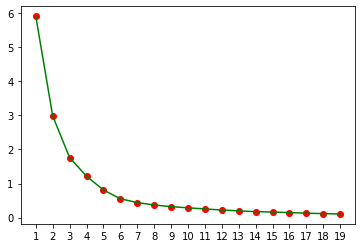

In [33]:
import matplotlib.pyplot as plt
plt.scatter(K,WCSS,c="red")
plt.plot(K,WCSS,c="green")
plt.xticks(range(1,20,1))

In [22]:
W1 = pd.DataFrame(model.cluster_centers_,columns=["X","Y"])

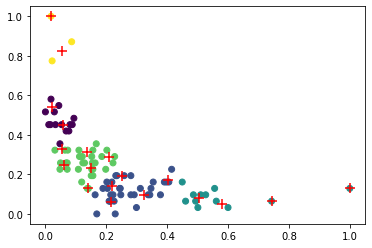

In [34]:
plt.scatter(Q.Price,Q['MPG.city'],c=W.Cluster)
plt.scatter(W1.X,W1.Y,c="red",s=100,marker="+")

In [25]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
model = km.fit(Q)
model.cluster_centers_

array([[0.25537948, 0.1143695 ],
       [0.04718218, 0.46774194],
       [0.55058978, 0.10138249],
       [0.12900981, 0.26585095],
       [0.04220183, 0.88172043]])